In [1]:
import os
os.getcwd()

'C:\\Users\\dasar\\Desktop\\Selva_Git_repo\\Data_Science\\Machine_Learning\\Class Projects\\Decision_Tree(CART algorithm)'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Iris flower data.csv')
data.head()

,studyName,Sample Number,Species,Island,Individual ID,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A1,11/11/2007,39.1,18.7,181,.,MALE,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Torgersen,N1A2,11/11/2007,39.5,17.4,186,3800,FEMALE,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A1,11/16/2007,40.3,18.0,.,3250,FEMALE,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Torgersen,N2A2,11/16/2007,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Torgersen,N3A1,11/16/2007,36.7,19.3,193,3450,FEMALE,NaN


In [4]:
data.columns

Index(['studyName', 'Sample Number', 'Species', 'Island', 'Individual ID',
       'Date Egg', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex', 'Comments'],
      dtype='object')

In [5]:
#  NON SIGNIFICANT VARIABLES - studyName', 'Sample Number',Date Egg, 'Individual ID','Comments'
# Drop the Non-significant variables

In [6]:
data.drop(['studyName', 'Sample Number','Date Egg', 'Individual ID','Comments'],inplace=True,axis=1)
data.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.1,18.7,181,.,MALE
1,Adelie Penguin (Pygoscelis adeliae),Torgersen,39.5,17.4,186,3800,FEMALE
2,Adelie Penguin (Pygoscelis adeliae),Torgersen,40.3,18.0,.,3250,FEMALE
3,Adelie Penguin (Pygoscelis adeliae),Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie Penguin (Pygoscelis adeliae),Torgersen,36.7,19.3,193,3450,FEMALE


## Data_Preprocessing

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  342 non-null    object 
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(2), object(5)
memory usage: 18.9+ KB


In [8]:
data.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Sex                    10
dtype: int64

In [9]:
(data.isnull().sum()/len(data))*100

Species                0.000000
Island                 0.000000
Culmen Length (mm)     0.581395
Culmen Depth (mm)      0.581395
Flipper Length (mm)    0.581395
Body Mass (g)          0.581395
Sex                    2.906977
dtype: float64

In [10]:
data['Flipper Length (mm)'].value_counts()

190    22
187    16
195    16
193    15
210    14
191    13
215    12
196    10
197    10
185     9
220     8
198     8
208     8
216     8
212     7
186     7
230     7
192     7
181     7
189     7
184     7
188     6
222     6
201     6
213     6
217     6
199     6
214     6
209     5
219     5
218     5
221     5
203     5
180     5
194     5
178     4
200     4
228     4
225     4
202     4
205     3
224     3
182     3
223     2
183     2
229     2
211     2
207     2
231     1
176     1
174     1
.       1
206     1
172     1
179     1
226     1
Name: Flipper Length (mm), dtype: int64

In [11]:
data['Flipper Length (mm)'] = np.where(data['Flipper Length (mm)']=='.',np.nan,data['Flipper Length (mm)'])

In [12]:
data['Flipper Length (mm)'] = pd.to_numeric(data['Flipper Length (mm)'])

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        342 non-null    object 
 6   Sex                  334 non-null    object 
dtypes: float64(3), object(4)
memory usage: 18.9+ KB


In [14]:
data['Body Mass (g)'] = np.where(data['Body Mass (g)']=='.',np.nan,data['Body Mass (g)'])

In [15]:
data['Body Mass (g)'] = pd.to_numeric(data['Body Mass (g)'])

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   342 non-null    float64
 3   Culmen Depth (mm)    342 non-null    float64
 4   Flipper Length (mm)  341 non-null    float64
 5   Body Mass (g)        341 non-null    float64
 6   Sex                  334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<AxesSubplot:xlabel='Culmen Length (mm)'>

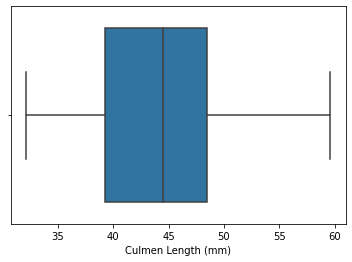

In [17]:
sns.boxplot(x ='Culmen Length (mm)',data = data )

<AxesSubplot:xlabel='Culmen Depth (mm)'>

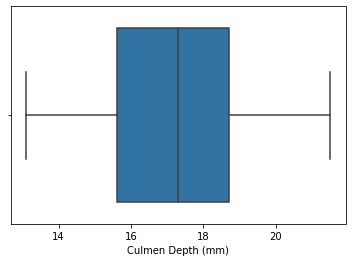

In [18]:
sns.boxplot(x ='Culmen Depth (mm)',data = data )

<AxesSubplot:xlabel='Flipper Length (mm)'>

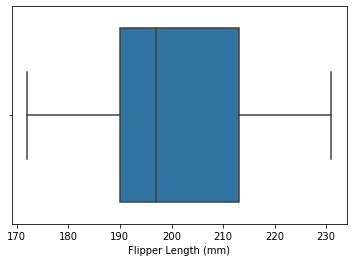

In [19]:
sns.boxplot(x ='Flipper Length (mm)',data = data )

<AxesSubplot:xlabel='Body Mass (g)'>

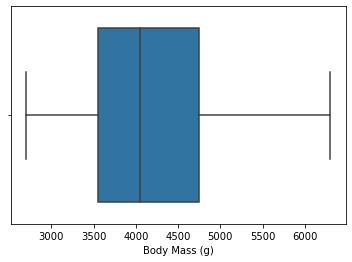

In [20]:
sns.boxplot(x ='Body Mass (g)',data = data )

In [21]:
data.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     3
Body Mass (g)           3
Sex                    10
dtype: int64

In [22]:
data['Culmen Length (mm)'] = data['Culmen Length (mm)'].fillna(data['Culmen Length (mm)'].mean())
data['Culmen Depth (mm)'] = data['Culmen Depth (mm)'].fillna(data['Culmen Depth (mm)'].mean())
data['Flipper Length (mm)'] = data['Flipper Length (mm)'].fillna(data['Flipper Length (mm)'].mean())
data['Body Mass (g)'] = data['Body Mass (g)'].fillna(data['Body Mass (g)'].mean())

In [23]:
data.isnull().sum()

Species                 0
Island                  0
Culmen Length (mm)      0
Culmen Depth (mm)       0
Flipper Length (mm)     0
Body Mass (g)           0
Sex                    10
dtype: int64

In [24]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: Sex, dtype: int64

In [25]:
data['Sex'] = np.where(data['Sex']=='.',np.nan,data['Sex'])

In [26]:
data['Sex'].value_counts()

MALE      168
FEMALE    165
Name: Sex, dtype: int64

In [27]:
data['Sex'] = data['Sex'].fillna('MALE')

In [28]:
data.isnull().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              344 non-null    object 
 1   Island               344 non-null    object 
 2   Culmen Length (mm)   344 non-null    float64
 3   Culmen Depth (mm)    344 non-null    float64
 4   Flipper Length (mm)  344 non-null    float64
 5   Body Mass (g)        344 non-null    float64
 6   Sex                  344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [30]:
data['Species']=data['Species'].astype('category')
data['Species'] = data['Species'].cat.codes

In [31]:
data.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,Torgersen,39.10000,18.70000,181.000000,4203.079179,MALE
1,0,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,0,Torgersen,40.30000,18.00000,200.932551,3250.000000,FEMALE
3,0,Torgersen,43.92193,17.15117,200.932551,4203.079179,MALE
4,0,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [32]:
data['Sex'] = data['Sex'].astype('category')
data['Sex'] = data['Sex'].cat.codes
data['Island'] =data['Island'].astype('category')
data['Island'] = data['Island'].cat.codes

In [33]:
data.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,0,2,39.10000,18.70000,181.000000,4203.079179,1
1,0,2,39.50000,17.40000,186.000000,3800.000000,0
2,0,2,40.30000,18.00000,200.932551,3250.000000,0
3,0,2,43.92193,17.15117,200.932551,4203.079179,1
4,0,2,36.70000,19.30000,193.000000,3450.000000,0


In [34]:
data  = pd.get_dummies(data,columns = ['Island','Sex'])

In [35]:
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_0,Island_1,Island_2,Sex_0,Sex_1
0,0,39.10000,18.70000,181.000000,4203.079179,0,0,1,0,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,0,1,1,0
2,0,40.30000,18.00000,200.932551,3250.000000,0,0,1,1,0
3,0,43.92193,17.15117,200.932551,4203.079179,0,0,1,0,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,0,1,1,0


In [36]:
data = data.drop(['Island_0','Sex_0'],axis=1)
data.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Island_1,Island_2,Sex_1
0,0,39.10000,18.70000,181.000000,4203.079179,0,1,1
1,0,39.50000,17.40000,186.000000,3800.000000,0,1,0
2,0,40.30000,18.00000,200.932551,3250.000000,0,1,0
3,0,43.92193,17.15117,200.932551,4203.079179,0,1,1
4,0,36.70000,19.30000,193.000000,3450.000000,0,1,0


Male_Counts =  179
Female_counts=  165


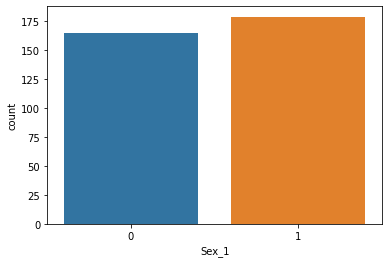

In [40]:
sns.countplot(x='Sex_1',data=data)
Male,Female = data['Sex_1'].value_counts()
print('Male_Counts = ',Male)
print('Female_counts= ',Female)
plt.show()

Species_A =  152
Species_B =  124
Species_C =  68


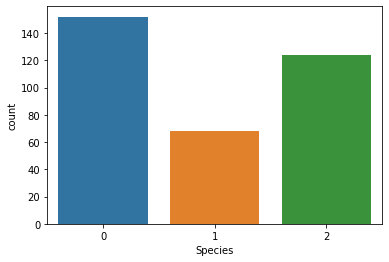

In [41]:
sns.countplot(x='Species',data=data)
A,b,c = data['Species'].value_counts()
print('Species_A = ',A)
print('Species_B = ',b)
print('Species_C = ',c)
plt.show()

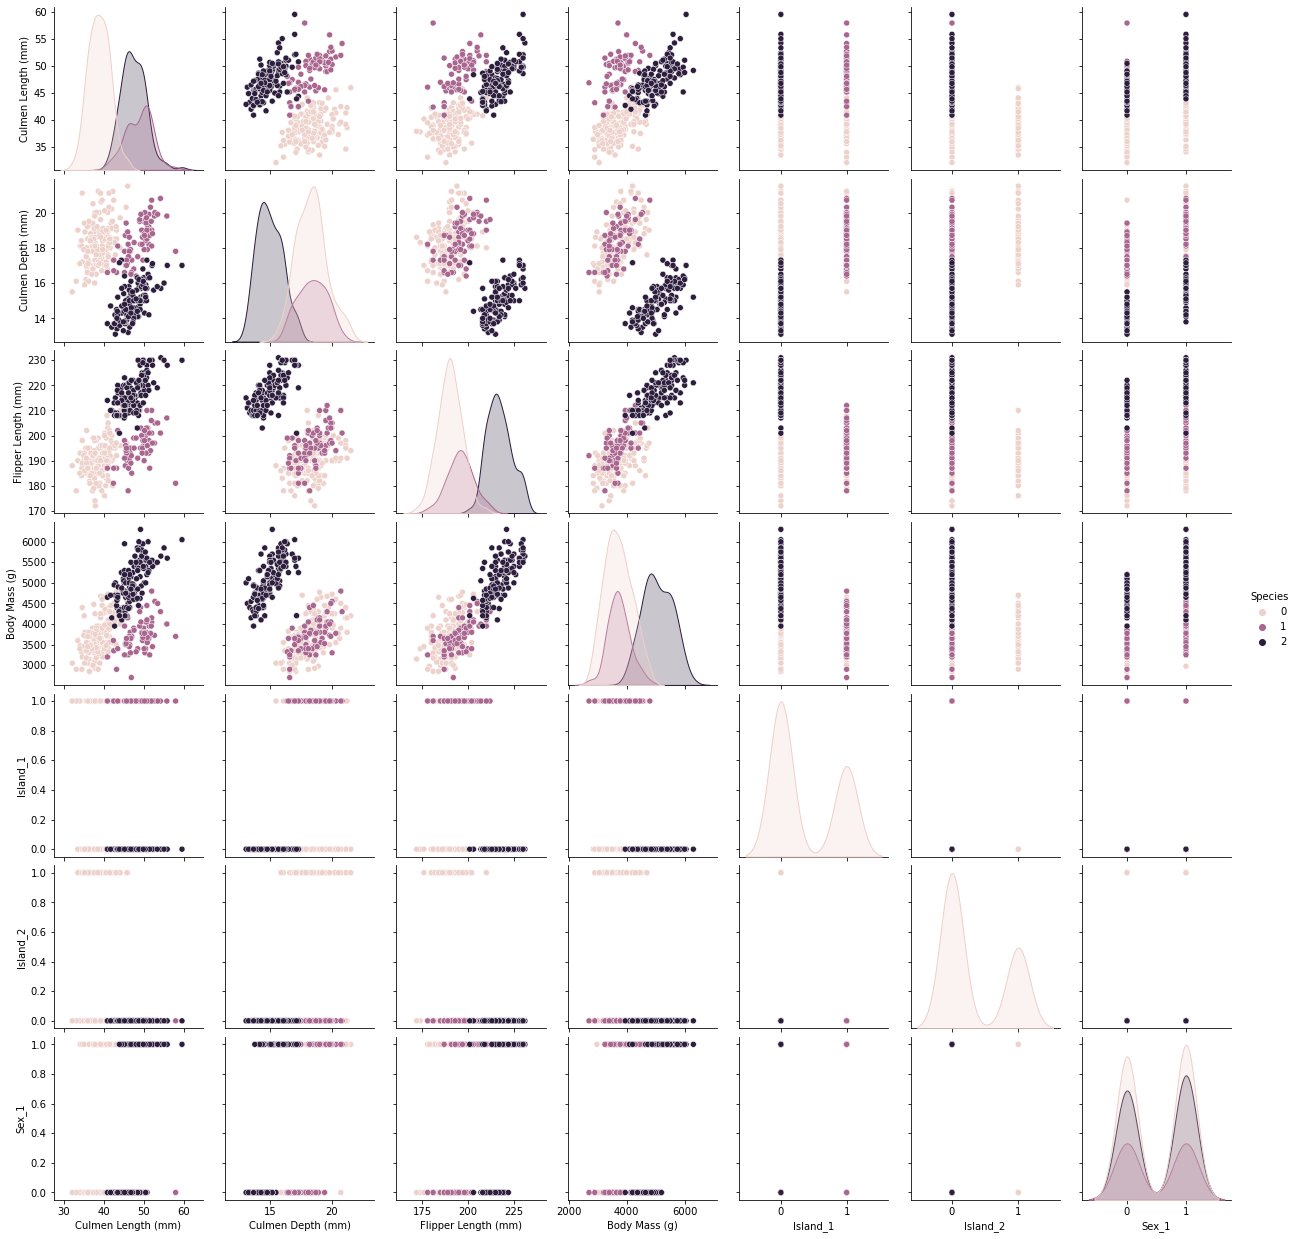

In [43]:
sns.pairplot(data=data,hue = 'Species')
plt.show()

<AxesSubplot:>

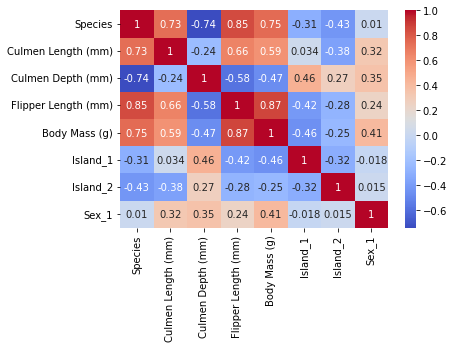

In [44]:
sns.heatmap(data.corr(),annot = True,cmap= 'coolwarm')

In [ ]:
# Split the data into dependent and independent varaibles

In [59]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [62]:
print(x.head())

   Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  Body Mass (g)  \
0            39.10000           18.70000           181.000000    4203.079179   
1            39.50000           17.40000           186.000000    3800.000000   
2            40.30000           18.00000           200.932551    3250.000000   
3            43.92193           17.15117           200.932551    4203.079179   
4            36.70000           19.30000           193.000000    3450.000000   

   Island_1  Island_2  Sex_1  
0         0         1      1  
1         0         1      0  
2         0         1      0  
3         0         1      1  
4         0         1      0  


In [64]:
print(y.head())

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int8


# split the data into train,test data

In [65]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,train_size=0.75,random_state=101)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(258, 7)
(258,)
(86, 7)
(86,)


# Decsison Tree Model

In [66]:
from sklearn.tree import DecisionTreeClassifier
dct1 = DecisionTreeClassifier(criterion='gini')
#dct1.fit(x_train,y_train)
dct2 = DecisionTreeClassifier(criterion='entropy')

#dct2.fit(x_train,y_train)

In [67]:
dct1.fit(x_train,y_train)

DecisionTreeClassifier()

In [68]:
dct2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

## Predict x_test,y_test with DecisionTree model

In [69]:
y1_pred_test = dct1.predict(x_test)
y1_pred_train = dct1.predict(x_train)

In [70]:
y2_pred_test = dct2.predict(x_test)
y2_pred_train = dct2.predict(x_train)

In [71]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [72]:
print(classification_report(y_train,y1_pred_train))
print('*****'*4)
print(classification_report(y_train,y2_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258

********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       115
           1       1.00      1.00      1.00        47
           2       1.00      1.00      1.00        96

    accuracy                           1.00       258
   macro avg       1.00      1.00      1.00       258
weighted avg       1.00      1.00      1.00       258



In [73]:
print(classification_report(y_test,y1_pred_test))
print('*****'*4)
print(classification_report(y_test,y2_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        28

    accuracy                           0.98        86
   macro avg       0.98      0.98      0.98        86
weighted avg       0.98      0.98      0.98        86

********************
              precision    recall  f1-score   support

           0       0.97      0.92      0.94        37
           1       0.87      0.95      0.91        21
           2       1.00      1.00      1.00        28

    accuracy                           0.95        86
   macro avg       0.95      0.96      0.95        86
weighted avg       0.96      0.95      0.95        86



In [75]:
print(accuracy_score(y_train,y1_pred_train))
print('*****'*4)
print(accuracy_score(y_train,y2_pred_train))

1.0
********************
1.0


In [74]:
print(accuracy_score(y_test,y1_pred_test))
print('*****'*4)
print(accuracy_score(y_test,y2_pred_test))

0.9767441860465116
********************
0.9534883720930233


In [77]:
print(confusion_matrix(y_train,y1_pred_train))
print('*****'*4)
print(confusion_matrix(y_train,y2_pred_train))

[[115   0   0]
 [  0  47   0]
 [  0   0  96]]
********************
[[115   0   0]
 [  0  47   0]
 [  0   0  96]]


In [76]:
print(confusion_matrix(y_test,y1_pred_test))
print('*****'*4)
print(confusion_matrix(y_test,y2_pred_test))

[[36  1  0]
 [ 1 20  0]
 [ 0  0 28]]
********************
[[34  3  0]
 [ 1 20  0]
 [ 0  0 28]]


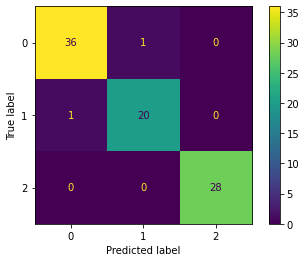

In [81]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dct1,x_test,y_test)
plt.show()

In [83]:
dct1.feature_importances_

array([0.3341183 , 0.04886235, 0.5467445 , 0.03744572, 0.02667367,
       0.00615546, 0.        ])

In [84]:
pd.DataFrame(index=x.columns,data=dct1.feature_importances_,columns=['Feature_Importance'])

,Feature_Importance
Culmen Length (mm),0.334118
Culmen Depth (mm),0.048862
Flipper Length (mm),0.546745
Body Mass (g),0.037446
Island_1,0.026674
Island_2,0.006155
Sex_1,0.000000


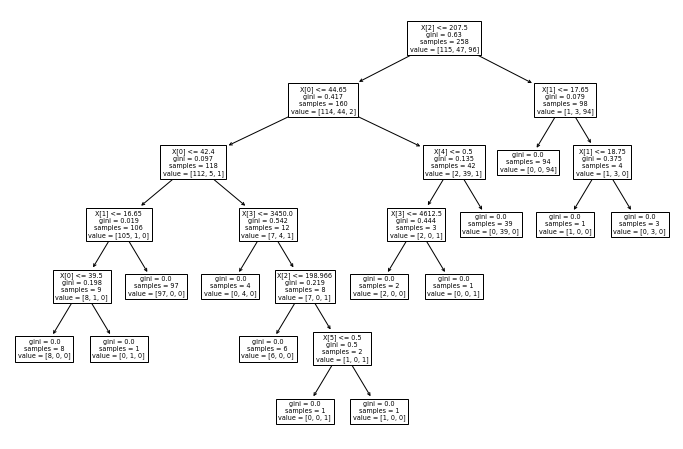

In [86]:
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(dct1)
plt.show()

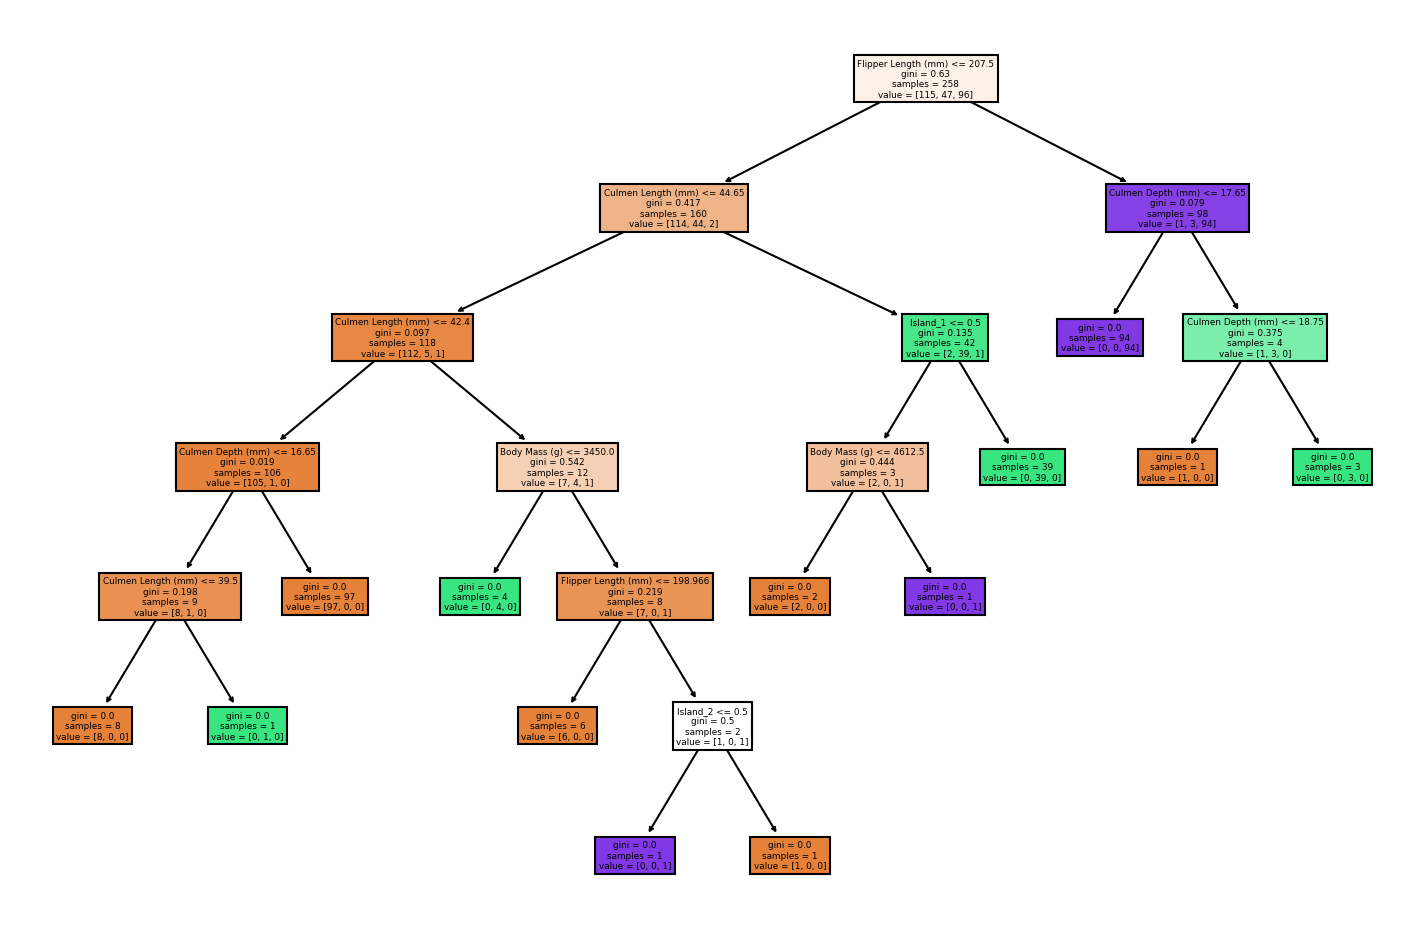

In [87]:
plt.figure(figsize=(12,8),dpi=150)
plot_tree(dct1,feature_names=x.columns,filled=True)
plt.show()

In [ ]:
## Pre_prunning and post_prunning data
# to avoid Over_fitting problems
# Pre_prunning is done before the model building i.e, drop the non-significant variables from the data
# Post_prunning is done by passing  model arguments with different values

In [92]:
def model_report(model):
    mod_pred= model.predict(x_test)
    print(classification_report(y_test,mod_pred))
    print('\n')
    print(confusion_matrix(y_test,mod_pred))
    print('\n')
    plt.figure(figsize=(12,8),dpi=140)
    plot_tree(model,filled=True,feature_names=x.columns)
    plt.show()

In [89]:
prunned_tree = DecisionTreeClassifier(max_depth=2)
prunned_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.87      0.95      0.91        21
           2       1.00      0.96      0.98        28

    accuracy                           0.95        86
   macro avg       0.95      0.95      0.95        86
weighted avg       0.96      0.95      0.95        86



[[35  2  0]
 [ 1 20  0]
 [ 0  1 27]]




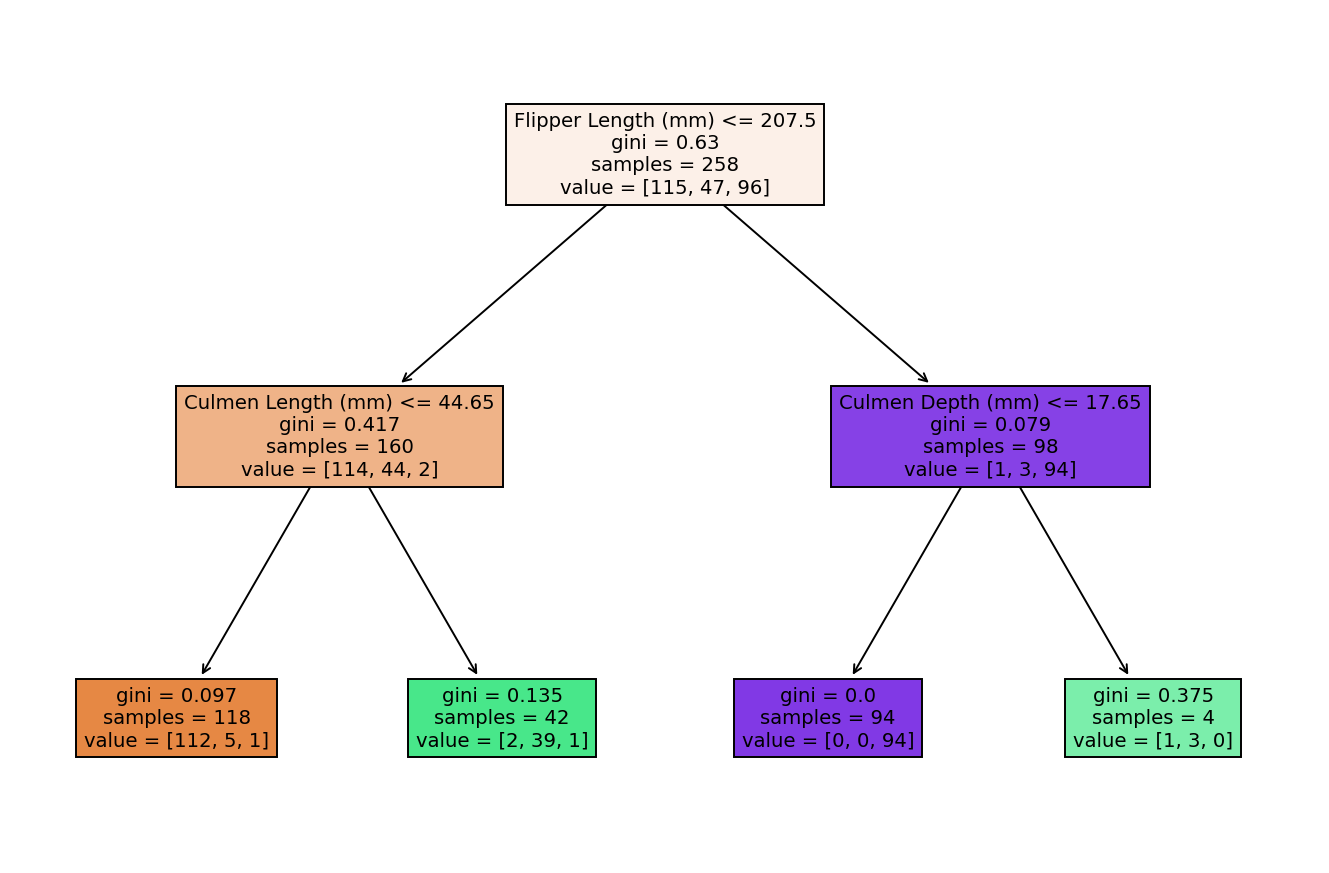

In [93]:
model_report(prunned_tree)

In [94]:
prunned_tree1 = DecisionTreeClassifier( max_leaf_nodes=3)
prunned_tree1.fit(x_train,y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        37
           1       0.90      0.90      0.90        21
           2       0.93      0.96      0.95        28

    accuracy                           0.94        86
   macro avg       0.94      0.94      0.94        86
weighted avg       0.94      0.94      0.94        86



[[35  1  1]
 [ 1 19  1]
 [ 0  1 27]]




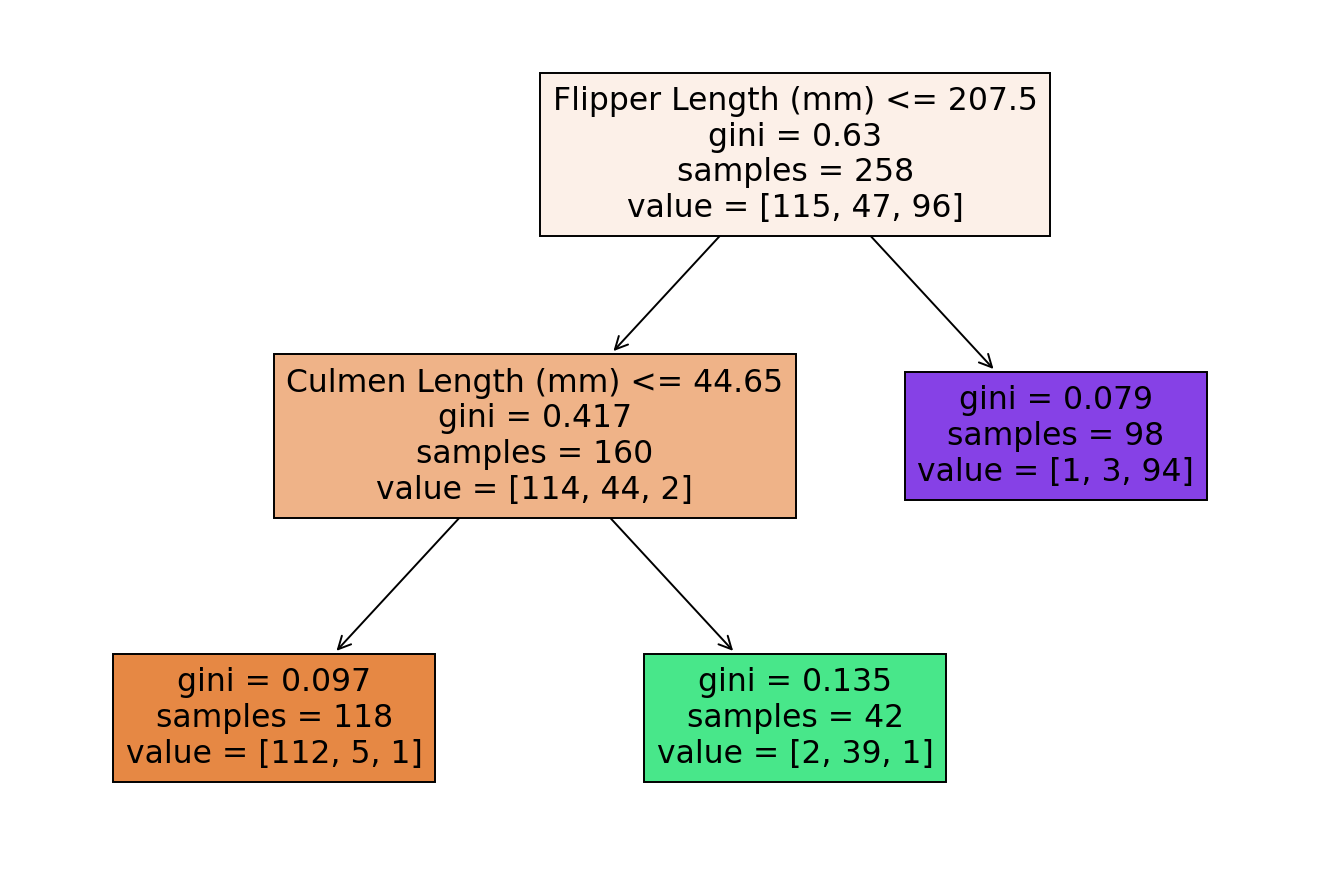

In [95]:
model_report(prunned_tree1)